<h1><center> TAREA 2 EJERCICIO 6</center></h1>

__Autor__: David Montaño Castro

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

plt.rcParams["figure.figsize"] = (15,10) 
pd.options.mode.chained_assignment = None

# Importar datos

In [2]:
df = pd.read_csv("universitarios.csv").drop(columns = "Generacion");df.head(3)

,Agricultura,Arquitectura,Artes,Biologia,Negocios,Periodismo,Computacion,Educacion,Ingenieria,LenguaInglesa,LenguasExtranjeras,Medicina,Matematicas,Fisica,Psicologia,Administracion,Sociales
0,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


# 5 Variables más importantes
Arquitectura, Negocios, Ingeniería, Periodísmo y Computación son las varaibles más importantes a utilizar en el modelo.

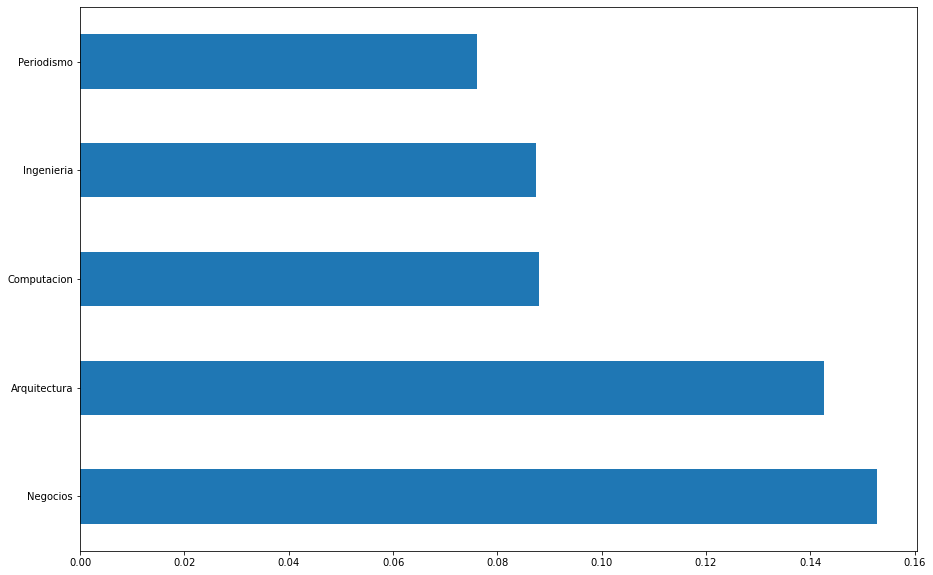

In [3]:
X = df.drop(columns = "Matematicas")
Y = df.Matematicas
selectioner = ExtraTreesRegressor().fit(X,Y)
selectioner.feature_importances_

feat_importances = pd.Series(selectioner.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [4]:
df1 = df[["Computacion", "Periodismo","Ingenieria","Negocios","Arquitectura","Matematicas"]]
X1 = df1.drop(columns = "Matematicas")
Y1 = df1.Matematicas

# Ajustar el árbol por 10 folios

--------------------------------------------------
Folio:  1
LEN 5
--------------------------------------------------
Folds= 10
R2= -1.9981002083932213
MAE= 1.9057142857142864
MSE= 5.449346938775511
RMSE= 2.3343836314486768
Varianza Explicada= -4.440892098500626e-16
--------------------------------------------------
--------------------------------------------------
Folio:  2
LEN 5
--------------------------------------------------
Folds= 10
R2= -1.2450404742902905
MAE= 0.6542857142857145
MSE= 0.6429795918367349
RMSE= 0.8018600824562443
Varianza Explicada= 0.0
--------------------------------------------------
--------------------------------------------------
Folio:  3
LEN 4
--------------------------------------------------
Folds= 10
R2= -9.652450585300384
MAE= 1.9216666666666704
MSE= 3.854855555555572
RMSE= 1.9633786072878485
Varianza Explicada= -9.290992132028455
--------------------------------------------------
--------------------------------------------------
Folio:  4
LEN 4
--

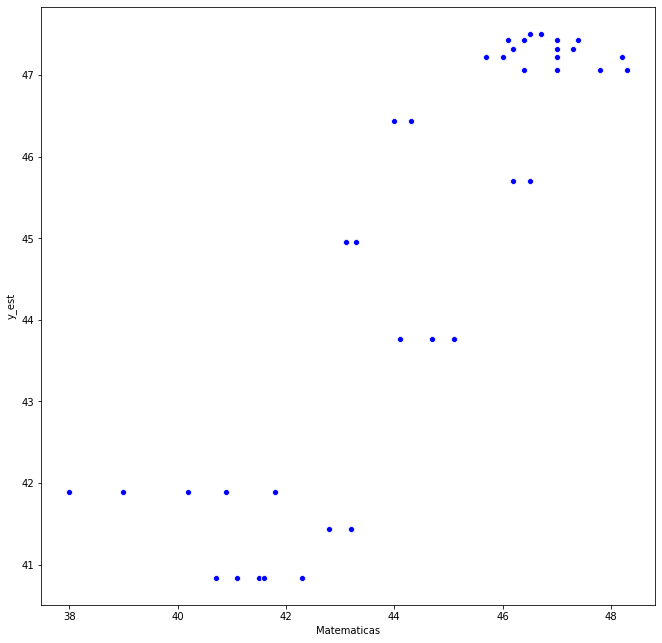

In [9]:
splits = 10
max_depth = 10
min_samples_leaf=5

X = X1
Y = Y1
Y_est = []
i=1
kfolds = KFold(n_splits=splits)
for train_index, test_index in kfolds.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]
    kfold_regressor = DecisionTreeRegressor(
                            criterion='mse',
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            max_features = "log2")\
                        .fit(X_train,Y_train)
    Y_k_est = kfold_regressor.predict(X_test)
    Y_est += list(Y_k_est)
    print('-'*50)
    print('Folio: ',i)
    print('LEN',len(Y_test))
    print('-'*50)
    print('Folds=',splits)
    print('R2=',r2_score(Y_test,Y_k_est))
    print('MAE=',mean_absolute_error(Y_test,Y_k_est))
    print('MSE=',mean_squared_error(Y_test,Y_k_est))
    print('RMSE=',np.sqrt(mean_squared_error(Y_test,Y_k_est)))
    print('Varianza Explicada=',explained_variance_score(Y_test,Y_k_est))
    print('-'*50)
    i += 1
df1['y_est']=Y_est

print('-'*50)
print('Validacion Cruzada')
print('-'*50)
print('FOLIOS =',splits)
print('R2=',r2_score(df1["Matematicas"],df1['y_est']))
print('MAE=',mean_absolute_error(df1["Matematicas"],df1['y_est']))
print('MSE=',mean_squared_error(df1["Matematicas"],df1['y_est']))
print('RMSE=',np.sqrt(mean_squared_error(df1["Matematicas"],df1['y_est'])))
print('Varianza Explicada=',explained_variance_score(df1["Matematicas"],df1['y_est']))
print('-'*50)
plt.figure(figsize=(11,11))
ax = sns.scatterplot(x=df1["Matematicas"],y=df1['y_est'] ,color='Blue') 

# Conclusión

Se obtiene de manera general una $R^2$ = 0.7333, lo cual cumple con el requerimiento de la tarea.